In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
train_data_dir = "/content/drive/MyDrive/Colab Notebooks/ASD/Dataset/"

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  labels='inferred',
  label_mode='categorical',
  validation_split=0.25,
  subset="training",
  seed=107,
  image_size=(224,224),
  batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  labels='inferred',
  label_mode='categorical',
  validation_split=0.25,
  subset="validation",
  seed=107,
  image_size=(224,224),
  batch_size=64)

Found 3040 files belonging to 2 classes.
Using 2280 files for training.
Found 3040 files belonging to 2 classes.
Using 760 files for validation.


In [45]:
from tensorflow.keras.applications import MobileNetV3Small, MobileNetV3Large

In [46]:
base_model = MobileNetV3Large(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [47]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

num_classes = 2

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 1, batch_size = 64)

36/36 [==============================] - 346s 7s/step - loss: 0.4927 - accuracy: 0.7702 - val_loss: 4.4477 - val_accuracy: 0.5053


In [50]:
import tensorflow as tf

model.save('/content/drive/MyDrive/Colab Notebooks/ASD/Saved_Model_History/mobileNetv3Large.h5')

# Save the history to a file
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/ASD/Saved_Model_History/mobileNetv3Large_history.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


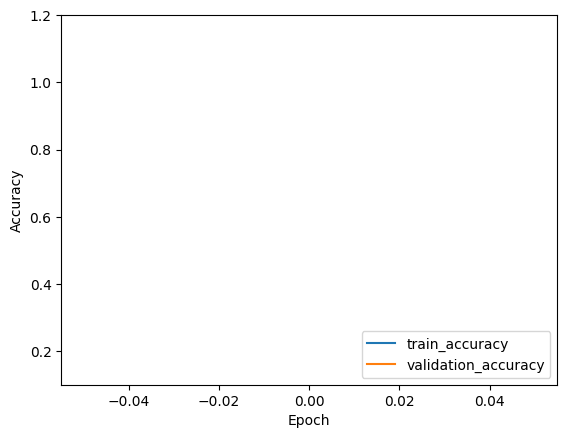

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

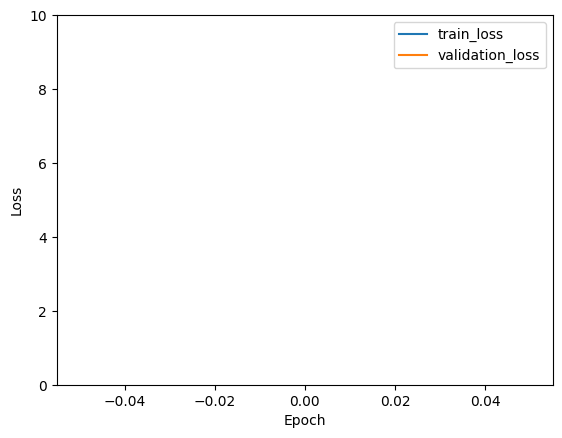

In [52]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 10])
plt.legend(loc='upper right')

2/2 [==============================] - 2s 820ms/step


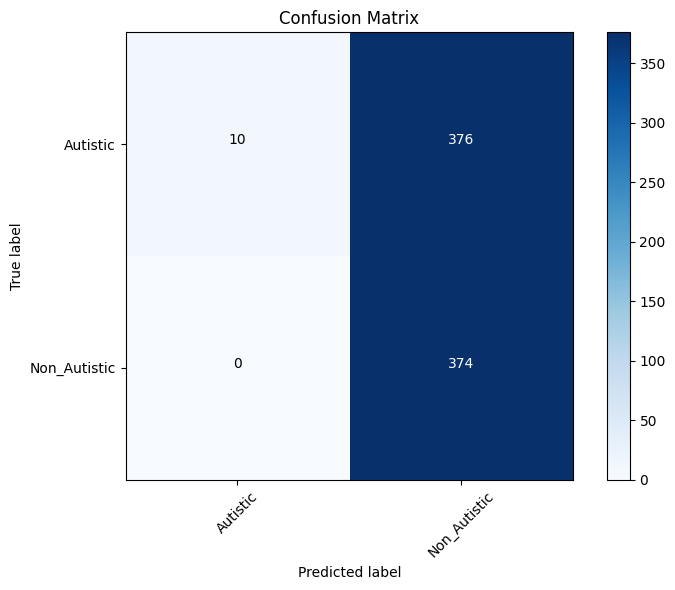

In [53]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

# Assuming you have already trained your model and have 'val_ds' for validation data

# Initialize empty lists for ground truth and predicted labels
y_true = []
y_pred = []

# Iterate through the validation dataset to collect labels
for x_batch, y_batch in val_ds:
    y_true.extend(np.argmax(y_batch, axis=1))  # Convert one-hot encoded labels to class indices
    y_pred.extend(np.argmax(model.predict(x_batch), axis=1))  # Make predictions using your trained model

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Autistic','Non_Autistic']  # Replace with your class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = confusion.max() / 2.0
for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
    plt.text(j, i, format(confusion[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import classification_report

# Assuming you have class_names defined as a list of class labels
class_names = ['Autistic','Non_Autistic']

# Calculate the classification report with class names
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Autistic       1.00      0.03      0.05       386
Non_Autistic       0.50      1.00      0.67       374

    accuracy                           0.51       760
   macro avg       0.75      0.51      0.36       760
weighted avg       0.75      0.51      0.35       760

